In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('../BNB_nue data/nue_uvw_scaled.csv', index_col=0)
df.head()

,isTrueTrack,pdg,completeness,purity,xu,zu,xv,zv,xw,zw,...,nHits,RSSu,RSSv,RSSw,envelopeu,envelopev,envelopew,lengthu,lengthv,lengthw
0,1,2212,1.000000,0.909091,"[119.256, 119.227, 118.956, 118.596, 118.286, ...","[452.06, 452.36, 452.66, 452.96, 453.26, 453.5...","[119.231, 119.332, 119.104, 118.985, 118.887, ...","[393.74, 394.04, 394.64, 394.94, 395.24, 395.5...","[119.384, 119.3, 119.172, 119.087, 119.007, 11...","[846.25, 846.55, 846.85, 847.15, 847.45, 847.7...",...,41,0.068989,0.019627,0.015505,8.780118,9.560003,9.579459,4.330168,4.704385,4.785806
1,0,11,0.892892,0.998911,"[164.312, 165.244, 164.521, 164.058, 163.652, ...","[264.26, 264.56, 264.86, 265.16, 265.46, 265.7...","[165.105, 165.067, 165.009, 164.947, 164.894, ...","[376.34, 376.64, 376.94, 377.24, 377.54, 377.8...","[165.12, 165.08, 165.017, 164.967, 164.921, 16...","[640.75, 641.05, 641.35, 641.65, 641.95, 642.2...",...,247,0.678124,0.208146,0.227368,15.270366,11.325856,15.046738,5.183616,5.209412,7.127999
2,1,2212,0.989362,0.965398,"[165.795, 165.82, 165.876, 165.935, 166.262, 1...","[265.46, 265.76, 266.06, 266.36, 266.66, 266.9...","[165.823, 165.872, 165.897, 165.947, 165.986, ...","[376.34, 376.64, 376.94, 377.24, 377.54, 377.8...","[165.52, 165.513, 165.514, 165.499, 165.503, 1...","[638.35, 638.65, 638.95, 639.25, 639.55, 639.8...",...,136,0.051740,0.042148,0.051166,9.527587,9.502338,9.154247,4.741021,4.736740,4.540850
3,0,11,0.975904,0.852632,"[29.2438, 30.0678, 30.8277, 31.6639, 32.5629, ...","[44.06, 44.36, 44.66, 44.96, 45.26, 45.56, 45....","[69.065, 68.488, 69.0648, 68.2429, 68.1845, 68...","[32.84, 32.84, 33.14, 33.14, 33.44, 33.74, 34....","[70.8057, 70.2276, 70.032, 36.6363, 35.3826, 3...","[85.15, 89.65, 90.55, 96.25, 96.25, 96.25, 96....",...,73,0.104682,0.095082,0.416976,8.368626,9.767846,18.236148,3.894744,4.287840,7.973702
4,1,2212,0.993789,0.977597,"[206.273, 206.107, 205.762, 205.37, 205.051, 2...","[531.26, 531.56, 531.86, 532.16, 532.46, 532.7...","[206.333, 206.315, 206.185, 205.851, 205.535, ...","[426.74, 427.04, 427.34, 427.64, 427.94, 428.2...","[206.366, 206.338, 206.139, 206.005, 205.845, ...","[958.45, 958.75, 959.05, 959.35, 959.65, 959.9...",...,242,0.025481,0.029441,0.017907,9.061623,10.049647,10.112642,4.524793,5.001940,5.047310


In [20]:
variables = ['eps','RSS', 'envelope', 'sliding']
variablesu = [s + 'u' for s in variables]
variablesv = [s + 'v' for s in variables]
variablesw = [s + 'w' for s in variables]
variables = sorted(variablesu+variablesv+variablesw)
variables

['RSSu',
 'RSSv',
 'RSSw',
 'envelopeu',
 'envelopev',
 'envelopew',
 'epsu',
 'epsv',
 'epsw',
 'slidingu',
 'slidingv',
 'slidingw']

In [5]:
df_cut = df.loc[(df['completeness']>0.8) & (df['purity']>0.7) & (df['nHits']>4) ]

In [55]:
planes=['u', 'v', 'w']
length=4
width=3
fig, axarr = plt.subplots(length, width, figsize=(20,10))
plt.gcf().subplots_adjust(bottom=-0.8)
y=0
x=0
for i in range(len(variables)):
    y=int(i/3)
    x=i%3
    sns.distplot(df_cut[df_cut.isTrueTrack==1][variables[i]], kde=False, label = 'track',ax=axarr[y][x])
    sns.distplot(df_cut[df_cut.isTrueTrack==0][variables[i]], kde=False, label='shower',ax=axarr[y][x])
    #sns.distplot(df_cut[df_cut.isTrueTrack==0]['epsw'], kde=False, label='w')
    axarr[i%length][count%width].legend()
    
    plt.legend()
    plt.close()

/home/dc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labe

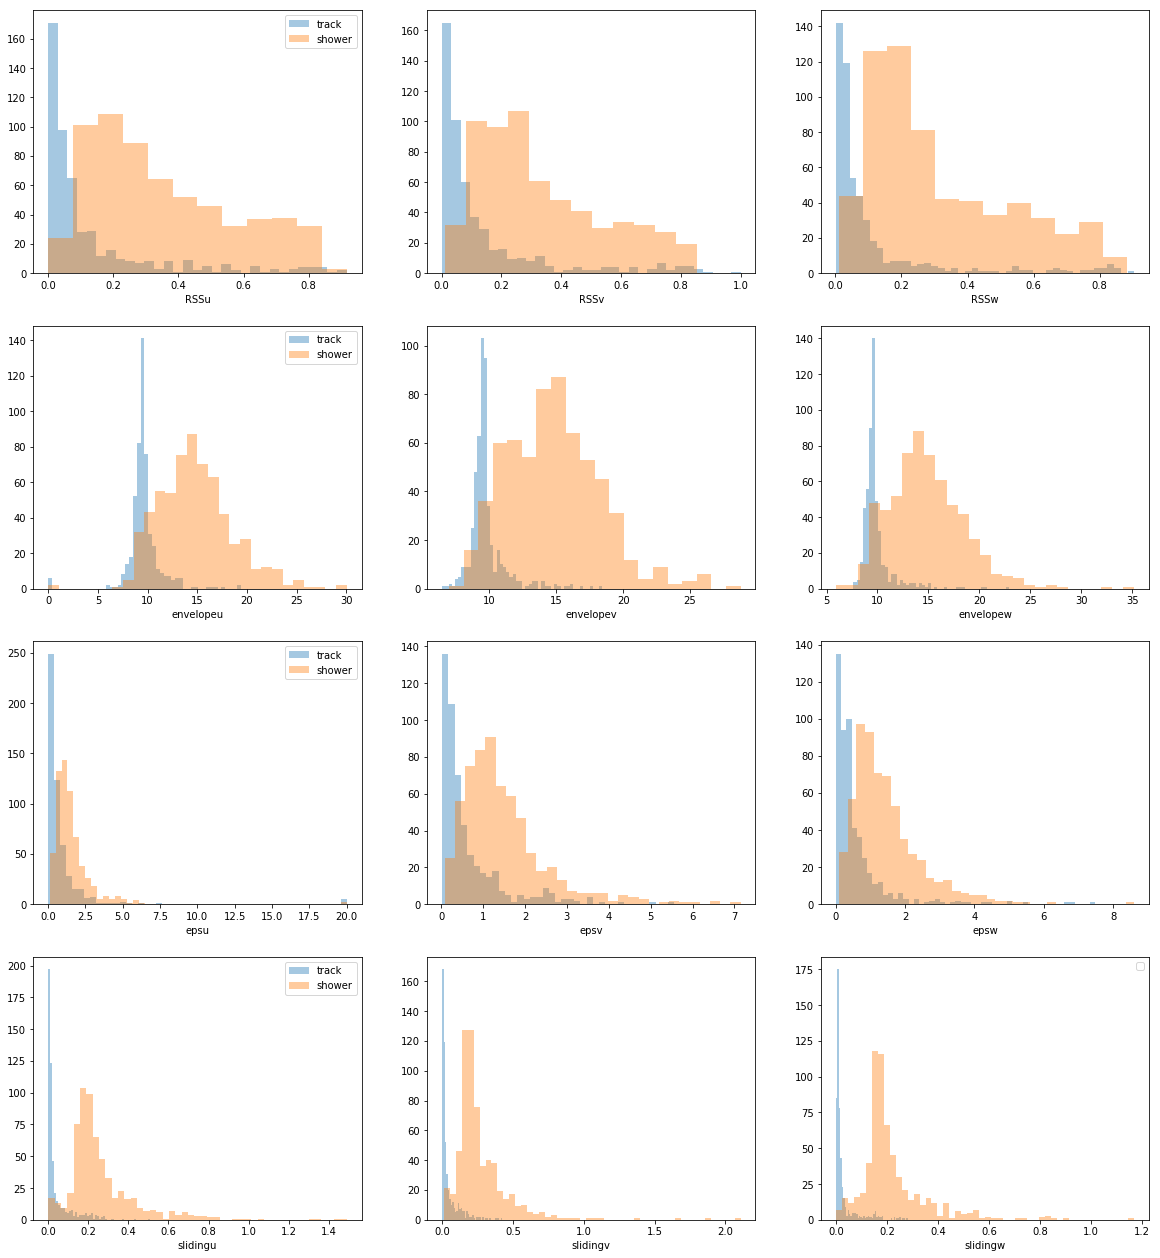

In [56]:
fig

In [78]:
train_variables=variablesw
clf = GradientBoostingClassifier(max_depth=len(train_variables), random_state=42)
y_pred = cross_val_predict(clf, df_cut[train_variables], df_cut['isTrueTrack'], cv=10)
conf_mat = confusion_matrix(df_cut['isTrueTrack'], y_pred)
conf_mat

array([[584,  43],
       [ 44, 473]])

In [79]:
train_variables=variables
clf = GradientBoostingClassifier(max_depth=len(train_variables), random_state=42)
y_pred = cross_val_predict(clf, df_cut[train_variables], df_cut['isTrueTrack'], cv=10)
conf_mat = confusion_matrix(df_cut['isTrueTrack'], y_pred)
conf_mat

array([[583,  44],
       [ 48, 469]])